In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Reading combined covid Dataset

In [2]:
covid_data = pd.read_parquet("../../../../data/covid_combined_dataset.parquet.gzip")
covid_data.head()

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
0,1001,Autauga County,AL,1,2020-01-22,0,0,55869
1,1001,Autauga County,AL,1,2020-01-23,0,0,55869
2,1001,Autauga County,AL,1,2020-01-24,0,0,55869
3,1001,Autauga County,AL,1,2020-01-25,0,0,55869
4,1001,Autauga County,AL,1,2020-01-26,0,0,55869


### Reading Data of latest week covid numbers of Alabama state

In [3]:
# Alabama state covid Data between 02/10/22-02/17/22
COVID_AL_STATUS = covid_data.loc[(covid_data["countyFIPS"] != 0) & (covid_data["State"] == "AL") & (covid_data["Date"] >= "2022-02-10")]
COVID_AL_STATUS.head()

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
750,1001,Autauga County,AL,1,2022-02-10,15155,173,55869
751,1001,Autauga County,AL,1,2022-02-11,15216,173,55869
752,1001,Autauga County,AL,1,2022-02-12,15216,173,55869
753,1001,Autauga County,AL,1,2022-02-13,15216,173,55869
754,1001,Autauga County,AL,1,2022-02-14,15325,176,55869


In [4]:
COVID_AL_STATUS.describe()

,countyFIPS,StateFIPS,Cases,Death,population
count,536.00000,536.0,536.000000,536.000000,536.000000
mean,1067.00000,1.0,18849.132463,262.649254,73181.865672
std,38.71429,0.0,28151.616232,338.012968,106628.522338
min,1001.00000,1.0,1774.000000,33.000000,8111.000000
25%,1033.00000,1.0,4513.000000,73.000000,17205.000000
50%,1067.00000,1.0,8363.500000,146.000000,33254.000000
75%,1101.00000,1.0,23502.000000,330.000000,83768.000000
max,1133.00000,1.0,181028.000000,2168.000000,658573.000000


#### Observations:
- On an average 18849 cases are reported and 262 deaths in the week (02/10/22-02/17/22).
- max number of confirmed cases and deaths in Alabama State in the week (02/10/22-02/17/22) are 181028 and 2168.
- min number of confirmed cases and deaths in Alabama State in the week (02/10/22-02/17/22) are 1774 and 33.

### Over all trend of covid cases in Alabama state in the week (02/10/22-02/17/22).

In [5]:
# Aggregation of counties data by grouping on Date 
COVID_AL_Agg = COVID_AL_STATUS.groupby("Date", as_index=False).sum()
# Dropping 'countyFIPS' column 
COVID_AL_Agg = COVID_AL_Agg.drop(['countyFIPS','StateFIPS'], axis=1)
COVID_AL_Agg

,Date,Cases,Death,population
0,2022-02-10,1256745,17502,4903185
1,2022-02-11,1259580,17505,4903185
2,2022-02-12,1259580,17505,4903185
3,2022-02-13,1259580,17505,4903185
4,2022-02-14,1263796,17571,4903185
5,2022-02-15,1265932,17656,4903185
6,2022-02-16,1267907,17749,4903185
7,2022-02-17,1270015,17787,4903185


### Plotting the graphs of confirmed cases and deaths trend of Alabama state cases in the week (02/10/22-02/17/22).

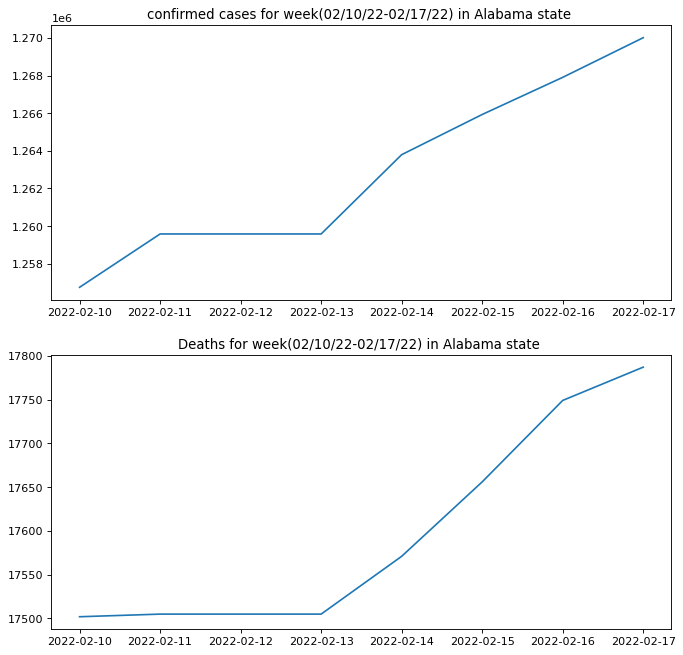

In [6]:
# Plot displaying "Date" as x-axis and normalized "Cases" and "Death" Data on y-axis
plt.figure(figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 1, 1)
plt.plot(COVID_AL_Agg["Date"], COVID_AL_Agg["Cases"])
plt.title('confirmed cases for week(02/10/22-02/17/22) in Alabama state ')
plt.subplot(2, 1, 2)
plt.plot(COVID_AL_Agg["Date"], COVID_AL_Agg["Death"])
plt.title('Deaths for week(02/10/22-02/17/22) in Alabama state ')
plt.show()

#### As we can see from plotted graphs confirmed cases and death have increased a bit in this week.

In [7]:
# read data from Hospital_beds parquet file. 
# Note: Since hospital beds dataset is more than 100 MB we have converted csv file to parquet file and reading data set.
hospitalBeds_data = pd.read_parquet("../../../../data/member/venkat/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.parquet.gzip")
hospitalBeds_data.head()

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_7_day_coverage,previous_day_admission_adult_covid_suspected_7_day_coverage,previous_day_admission_pediatric_covid_suspected_7_day_coverage,previous_week_personnel_covid_vaccinated_doses_administered_7_day,total_personnel_covid_vaccinated_doses_none_7_day,total_personnel_covid_vaccinated_doses_one_7_day,total_personnel_covid_vaccinated_doses_all_7_day,previous_week_patients_covid_vaccinated_doses_one_7_day,previous_week_patients_covid_vaccinated_doses_all_7_day,is_corrected
0,372012,2/4/2022,OK,372012,INSPIRE SPECIALTY HOSPITAL,8210 NATIONAL AVENUE,MIDWEST CITY,73110.0,Long Term,40109.0,...,7,7,7,10.0,32.0,4.0,25.0,10.0,10.0,False
1,61305,1/28/2022,CO,61305,MELISSA MEMORIAL HOSPITAL,1001 E JOHNSON ST,HOLYOKE,80734.0,Critical Access Hospitals,8095.0,...,7,7,7,0.0,13.0,0.0,0.0,0.0,0.0,False
2,171342,1/28/2022,KS,171342,RUSH COUNTY MEMORIAL HOSPITAL,801 LOCUST ST,LA CROSSE,67548.0,Critical Access Hospitals,20165.0,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False
3,451396,1/28/2022,TX,451396,BAYLOR SCOTT & WHITE MEDICAL CENTER - LLANO,200 W OLLIE,LLANO,78643.0,Critical Access Hospitals,48299.0,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False
4,62014,1/21/2022,CO,62014,VIBRA HOSPITAL OF DENVER,8451 PEARL ST,THORNTON,80229.0,Long Term,8001.0,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False


### Cleaning the data 

In [8]:
hospitalBeds_data=hospitalBeds_data[['state','hospital_name','city','hospital_subtype','fips_code','total_beds_7_day_avg',
                     'inpatient_beds_used_7_day_avg','total_adult_patients_hospitalized_confirmed_covid_7_day_avg',
                     'total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg','inpatient_beds_7_day_avg',
                    'total_icu_beds_7_day_avg','icu_beds_used_7_day_avg','staffed_icu_adult_patients_confirmed_covid_7_day_avg']]




#Converted all NAN cells to 0
hospitalBeds_data = hospitalBeds_data.fillna(0)

#Cleaning data( replacing all -999999 with 0)
hospitalBeds_data = hospitalBeds_data.replace(-999999.0,0.0)


# Using astype() converting object values to int type
hospitalBeds_data = hospitalBeds_data[['fips_code','total_beds_7_day_avg','inpatient_beds_used_7_day_avg','total_adult_patients_hospitalized_confirmed_covid_7_day_avg',
                            'total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg','inpatient_beds_7_day_avg','total_icu_beds_7_day_avg',
                            'icu_beds_used_7_day_avg','staffed_icu_adult_patients_confirmed_covid_7_day_avg']].astype(int)

hospitalBeds_data.rename(columns = {'fips_code':'countyFIPS'},inplace=True)
hospitalBeds_data.head()

,countyFIPS,total_beds_7_day_avg,inpatient_beds_used_7_day_avg,total_adult_patients_hospitalized_confirmed_covid_7_day_avg,total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg,inpatient_beds_7_day_avg,total_icu_beds_7_day_avg,icu_beds_used_7_day_avg,staffed_icu_adult_patients_confirmed_covid_7_day_avg
0,40109,0,18,0,0,31,0,0,0
1,8095,0,0,0,0,15,0,0,0
2,20165,0,17,0,0,25,0,0,0
3,48299,0,0,0,0,0,0,0,0
4,8001,0,41,0,0,54,0,0,0


### Merging hospital beds dataset with covid data

In [9]:
hospitalBeds_merged = pd.merge(covid_data,hospitalBeds_data,on='countyFIPS')
hospitalBeds_merged.head()

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,total_beds_7_day_avg,inpatient_beds_used_7_day_avg,total_adult_patients_hospitalized_confirmed_covid_7_day_avg,total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg,inpatient_beds_7_day_avg,total_icu_beds_7_day_avg,icu_beds_used_7_day_avg,staffed_icu_adult_patients_confirmed_covid_7_day_avg
0,1001,Autauga County,AL,1,2020-01-22,0,0,55869,109,78,29,0,89,6,8,0
1,1001,Autauga County,AL,1,2020-01-22,0,0,55869,109,78,25,0,89,6,9,0
2,1001,Autauga County,AL,1,2020-01-22,0,0,55869,109,75,35,0,89,6,11,4
3,1001,Autauga County,AL,1,2020-01-22,0,0,55869,109,75,31,0,89,6,11,0
4,1001,Autauga County,AL,1,2020-01-22,0,0,55869,109,68,29,0,89,6,10,4
